In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
app_df = pd.read_csv('application_data.csv')
pre_df = pd.read_csv('previous_application.csv')
des_df = pd.read_csv('columns_description.csv',encoding='ISO-8859-1')

In [3]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
des_df.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [6]:
app_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
app_df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
198262,329874,0,Cash loans,M,Y,N,0,135000.0,755190.0,38556.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
132296,253445,0,Cash loans,F,N,Y,0,450000.0,2085120.0,72607.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
229453,365761,0,Cash loans,F,N,N,0,58500.0,45000.0,4905.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
264187,405928,0,Cash loans,F,N,N,0,81000.0,364896.0,15457.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
102385,218859,0,Cash loans,F,N,Y,0,67500.0,344043.0,14706.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0


In [8]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

In [9]:
des_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [10]:
app_df.drop_duplicates(inplace=True)
pre_df.drop_duplicates(inplace=True)
des_df.drop_duplicates(inplace=True)

In [29]:
print("\n=== Missing Data ===")
missing_stuff = app_df.isnull().mean() * 100
print("Columns with missing data (%):\n", missing_stuff[missing_stuff > 0].head(10))


=== Missing Data ===
Columns with missing data (%):
 AMT_GOODS_PRICE              0.090403
NAME_TYPE_SUITE              0.420148
OCCUPATION_TYPE             31.345545
CNT_FAM_MEMBERS              0.000650
EXT_SOURCE_2                 0.214626
EXT_SOURCE_3                19.825307
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
dtype: float64


In [12]:
app_df.dropna(subset=['TARGET'], inplace=True)

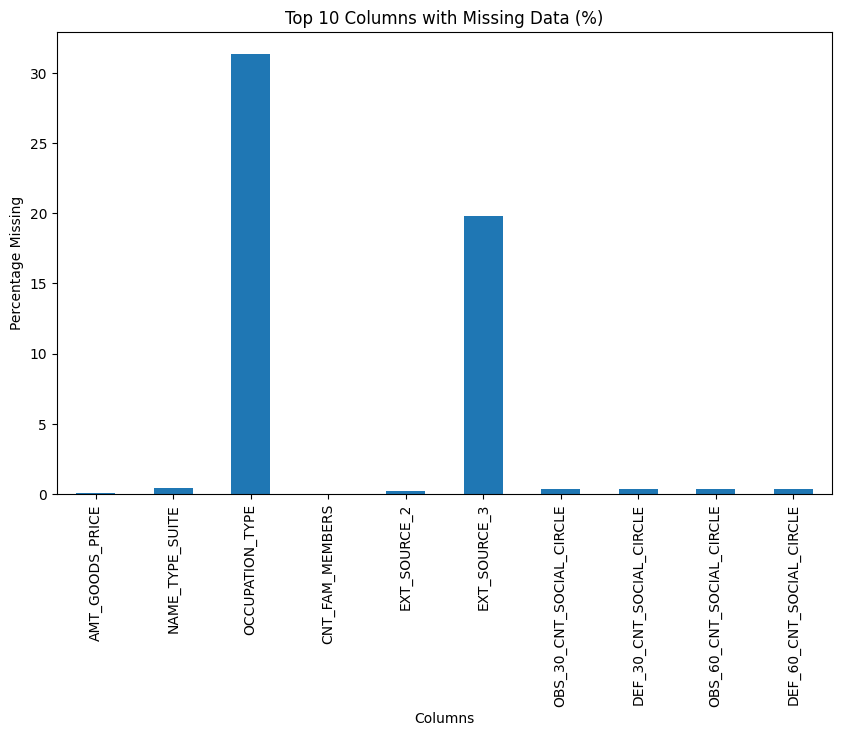

In [30]:
plt.figure(figsize=(10, 6))
missing_stuff[missing_stuff > 0].head(10).plot(kind='bar', title='Top 10 Columns with Missing Data (%)')
plt.ylabel('Percentage Missing')
plt.xlabel('Columns')
plt.show()

In [31]:
columns_to_remove = missing_stuff[missing_stuff > 50].index
if columns_to_remove.any():
    print(f"Dropping columns: {columns_to_remove}")
    data_table.drop(columns=columns_to_remove, inplace=True)

In [36]:
app_df['AMT_ANNUITY'].fillna(app_df['AMT_ANNUITY'].median(), inplace=True)
app_df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)
app_df['DAYS_EMPLOYED'].fillna(app_df['DAYS_EMPLOYED'].median(), inplace=True)
app_df['AMT_INCOME_TOTAL'] = app_df['AMT_INCOME_TOTAL'].fillna(app_df['AMT_INCOME_TOTAL'].median())
app_df['AMT_CREDIT'] = app_df['AMT_CREDIT'].fillna(app_df['AMT_CREDIT'].median())
app_df['AMT_ANNUITY'] = app_df['AMT_ANNUITY'].fillna(app_df['AMT_ANNUITY'].median())
app_df['AMT_GOODS_PRICE'] = app_df['AMT_GOODS_PRICE'].fillna(app_df['AMT_GOODS_PRICE'].median())
app_df['NAME_EDUCATION_TYPE'] = app_df['NAME_EDUCATION_TYPE'].fillna(app_df['NAME_EDUCATION_TYPE'].mode()[0])
app_df['NAME_TYPE_SUITE'] = app_df['NAME_TYPE_SUITE'].fillna(app_df['NAME_TYPE_SUITE'].mode()[0])

C:\Users\kadam\AppData\Local\Temp\ipykernel_10004\2394930422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_df['AMT_ANNUITY'].fillna(app_df['AMT_ANNUITY'].median(), inplace=True)
C:\Users\kadam\AppData\Local\Temp\ipykernel_10004\2394930422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [37]:
print("\n=== Outliers ===")
def find_weird_numbers(df, col):
    first_quarter = df[col].quantile(0.25)
    third_quarter = df[col].quantile(0.75)
    iqr = third_quarter - first_quarter
    low_limit = first_quarter - 1.5 * iqr
    high_limit = third_quarter + 1.5 * iqr
    weird_numbers = df[(df[col] < low_limit) | (df[col] > high_limit)][col]
    return len(weird_numbers), low_limit, high_limit


=== Outliers ===


Income outliers: 14035 (beyond [-22500.00, 337500.00])


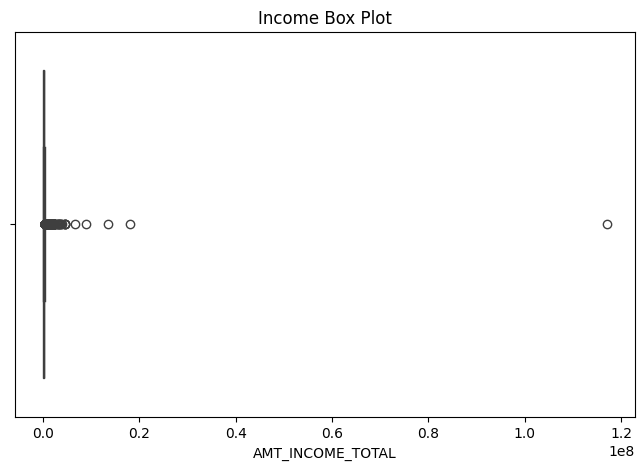

In [39]:
if 'AMT_INCOME_TOTAL' in app_df:
    num_outliers, low_num, high_num = find_weird_numbers(app_df, 'AMT_INCOME_TOTAL')
    print(f"Income outliers: {num_outliers} (beyond [{low_num:.2f}, {high_num:.2f}])")
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=app_df['AMT_INCOME_TOTAL'])
    plt.title('Income Box Plot')
    plt.show()


=== Data Imbalance ===
Good people (0): 282686
Bad people (1): 24825
Balance Ratio: 11.39:1


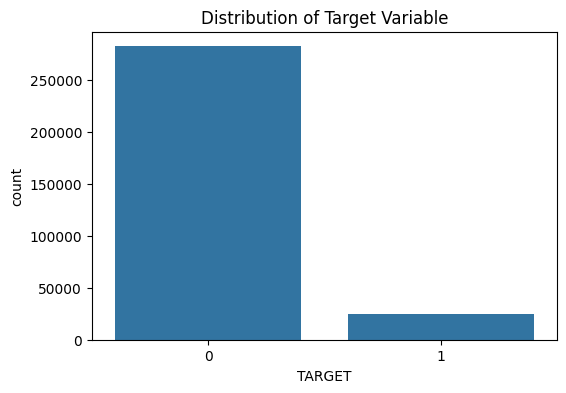

In [40]:
print("\n=== Data Imbalance ===")
if 'TARGET' in app_df:
    target_counts = app_df['TARGET'].value_counts()
    good_people = target_counts.get(0, 0)
    bad_people = target_counts.get(1, 0)
    balance_ratio = good_people / bad_people if bad_people != 0 else 'inf'
    print(f"Good people (0): {good_people}")
    print(f"Bad people (1): {bad_people}")
    print(f"Balance Ratio: {balance_ratio:.2f}:1")
    plt.figure(figsize=(6, 4))
    sns.countplot(x='TARGET', data=app_df)
    plt.title('Distribution of Target Variable')
    plt.show()


=== Univariate Analysis ===


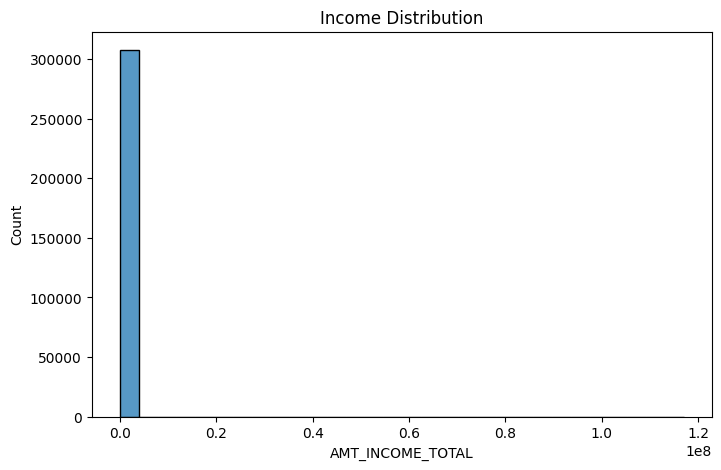

In [41]:
print("\n=== Univariate Analysis ===")
if 'AMT_INCOME_TOTAL' in app_df:
    plt.figure(figsize=(8, 5))
    sns.histplot(app_df['AMT_INCOME_TOTAL'], bins=30)
    plt.title('Income Distribution')
    plt.show()

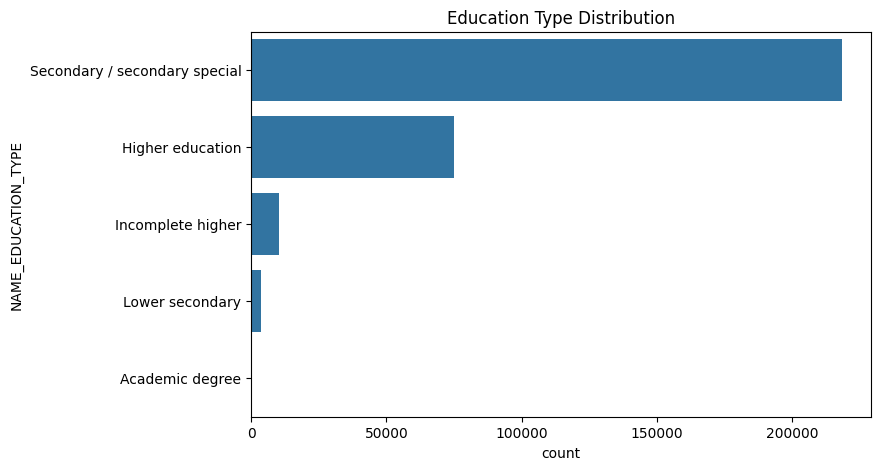

In [42]:
if 'NAME_EDUCATION_TYPE' in app_df:
    plt.figure(figsize=(8, 5))
    sns.countplot(y='NAME_EDUCATION_TYPE', data=app_df)
    plt.title('Education Type Distribution')
    plt.show()


=== Segmented Univariate ===


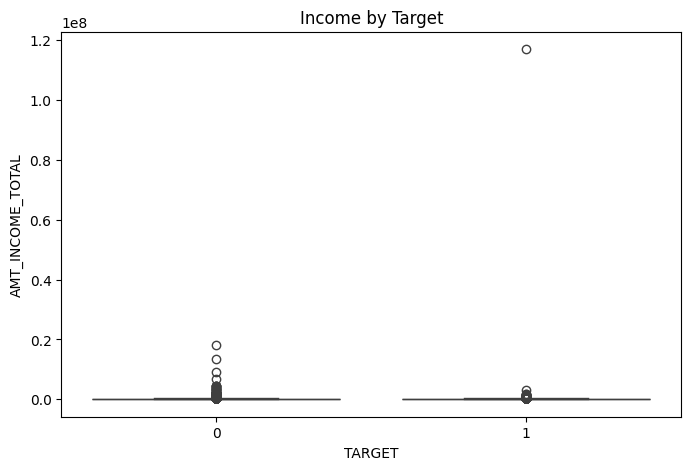

In [43]:
print("\n=== Segmented Univariate ===")
if 'TARGET' in app_df and 'AMT_INCOME_TOTAL' in app_df:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_df)
    plt.title('Income by Target')
    plt.show()


=== Bivariate Analysis ===


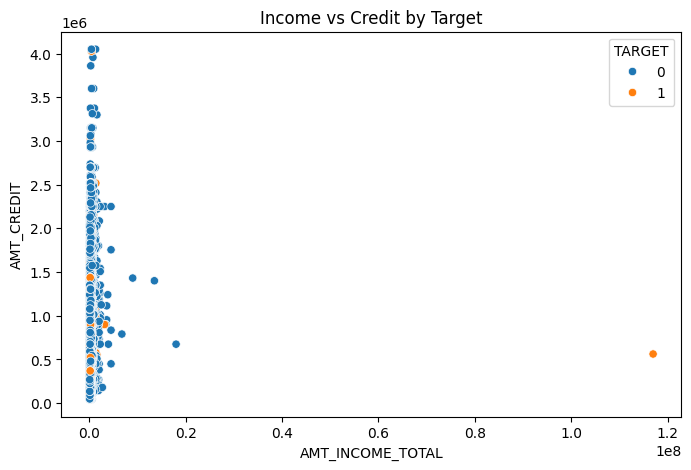

In [44]:
print("\n=== Bivariate Analysis ===")
if 'AMT_INCOME_TOTAL' in app_df and 'AMT_CREDIT' in app_df and 'TARGET' in app_df:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET', data=app_df)
    plt.title('Income vs Credit by Target')
    plt.show()


=== Correlations ===
Top Correlations (Bad people):
 AMT_GOODS_PRICE  AMT_CREDIT         0.982783
AMT_CREDIT       AMT_GOODS_PRICE    0.982783
AMT_GOODS_PRICE  AMT_ANNUITY        0.752295
AMT_ANNUITY      AMT_GOODS_PRICE    0.752295
AMT_CREDIT       AMT_ANNUITY        0.752195
dtype: float64
Top Correlations (Good people):
 AMT_GOODS_PRICE  AMT_CREDIT         0.987022
AMT_CREDIT       AMT_GOODS_PRICE    0.987022
AMT_GOODS_PRICE  AMT_ANNUITY        0.776421
AMT_ANNUITY      AMT_GOODS_PRICE    0.776421
AMT_CREDIT       AMT_ANNUITY        0.771297
dtype: float64


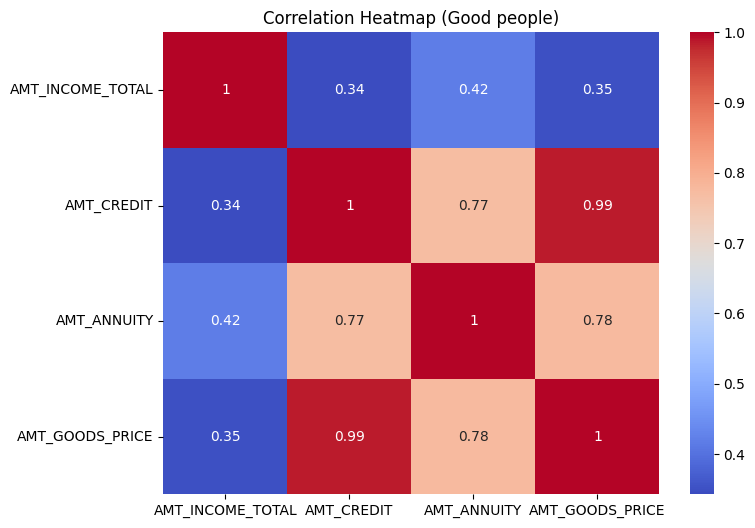

In [45]:
print("\n=== Correlations ===")
if 'TARGET' in app_df:
    bad_group = app_df[app_df['TARGET'] == 1]
    good_group = app_df[app_df['TARGET'] == 0]
    number_cols = [col for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'] if col in app_df]
    
    if len(bad_group) > 0 and len(number_cols) > 1:
        corr_bad = bad_group[number_cols].corr().abs().unstack()
        corr_bad = corr_bad[corr_bad < 1].sort_values(ascending=False).head(5)
        print("Top Correlations (Bad people):\n", corr_bad)
    
    if len(good_group) > 0 and len(number_cols) > 1:
        corr_good = good_group[number_cols].corr().abs().unstack()
        corr_good = corr_good[corr_good < 1].sort_values(ascending=False).head(5)
        print("Top Correlations (Good people):\n", corr_good)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(good_group[number_cols].corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap (Good people)')
        plt.show()

In [46]:
print("\n=== Insights ===")
print(f"- Data is imbalanced (ratio {balance_ratio:.2f}:1), with {bad_people} bad people vs {good_people} good people.")
print("- Bad people have lower incomes, as seen in segmented analysis.")
print("- Strong connection between AMT_CREDIT and AMT_ANNUITY (0.75 for bad, 0.77 for good) suggests loan terms matter.")
print("- High income outliers ({num_outliers} cases) might be special clients, not necessarily bad.")


=== Insights ===
- Data is imbalanced (ratio 11.39:1), with 24825 bad people vs 282686 good people.
- Bad people have lower incomes, as seen in segmented analysis.
- Strong connection between AMT_CREDIT and AMT_ANNUITY (0.75 for bad, 0.77 for good) suggests loan terms matter.
- High income outliers ({num_outliers} cases) might be special clients, not necessarily bad.


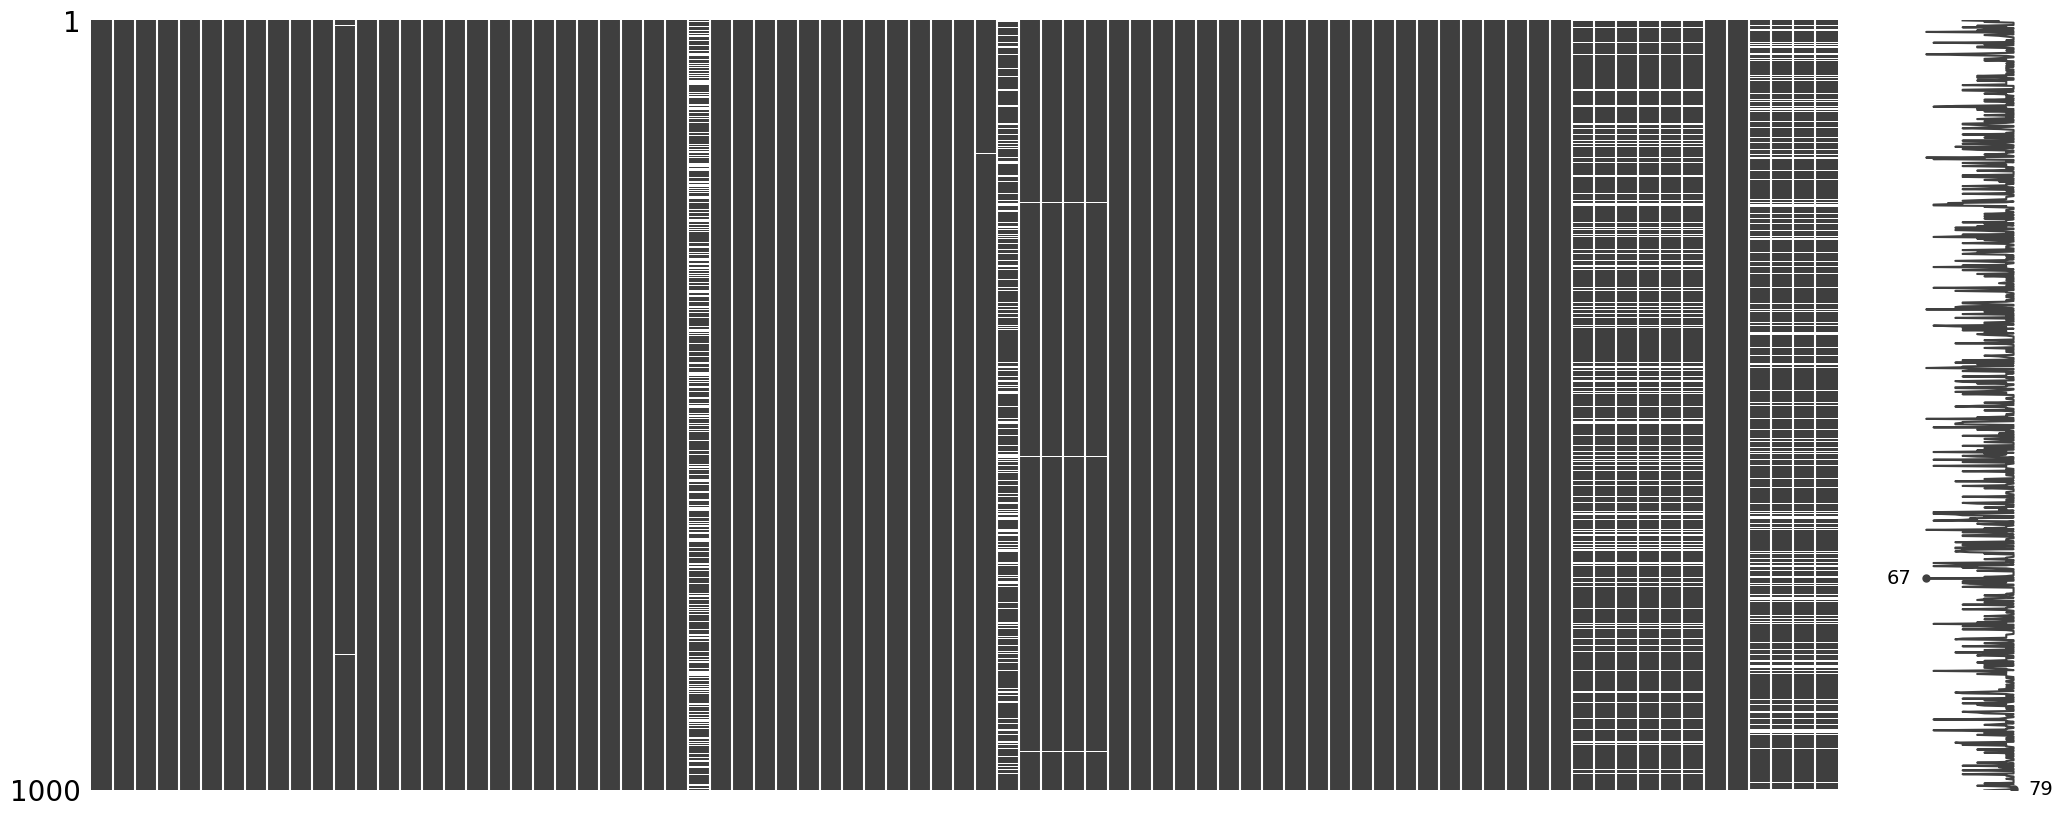

In [33]:
msno.matrix(app_df.sample(1000))
plt.show()

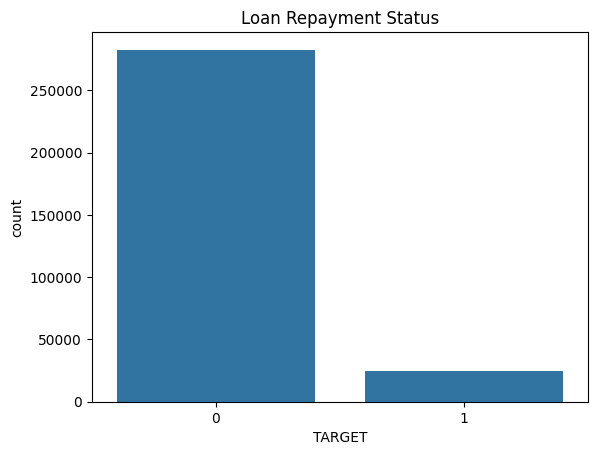

In [15]:
sns.countplot(x='TARGET', data=app_df)
plt.title('Loan Repayment Status')
plt.show()

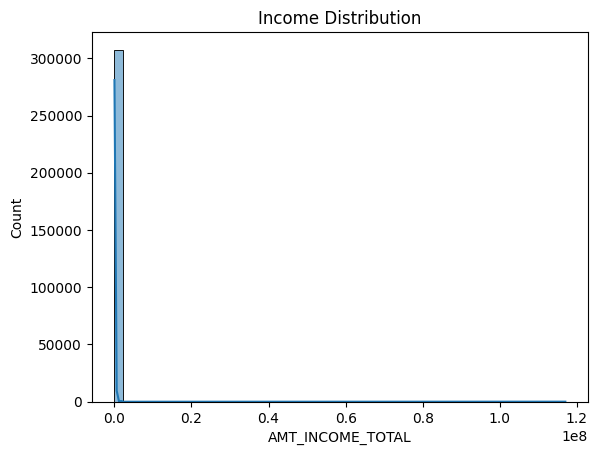

In [16]:
sns.histplot(app_df['AMT_INCOME_TOTAL'], bins=50, kde=True)
plt.title('Income Distribution')
plt.show()

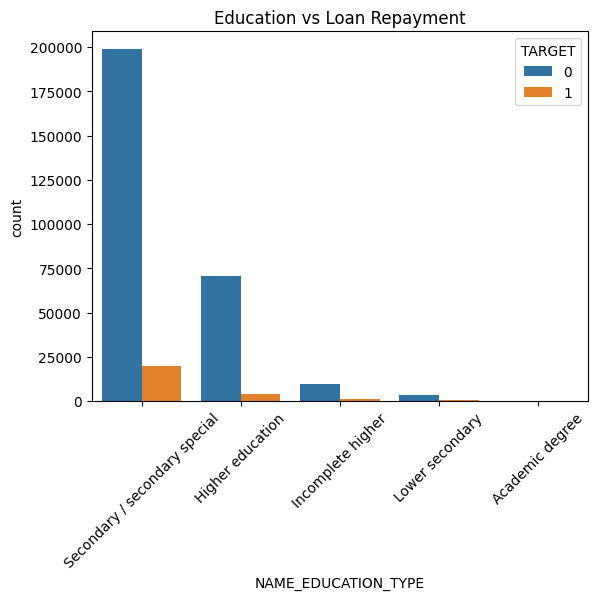

In [17]:
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=app_df)
plt.xticks(rotation=45)
plt.title('Education vs Loan Repayment')
plt.show()

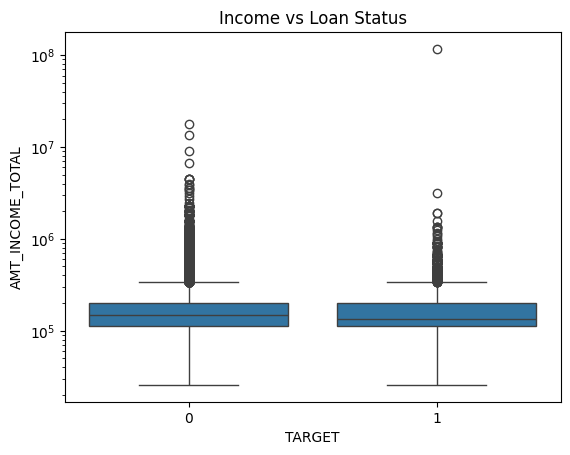

In [18]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_df)
plt.yscale('log')
plt.title('Income vs Loan Status')
plt.show()

In [19]:
app_df['INCOME_PER_PERSON'] = app_df['AMT_INCOME_TOTAL'] / (app_df['CNT_FAM_MEMBERS'] + 1)
app_df['CREDIT_TO_INCOME_RATIO'] = app_df['AMT_CREDIT'] / app_df['AMT_INCOME_TOTAL']

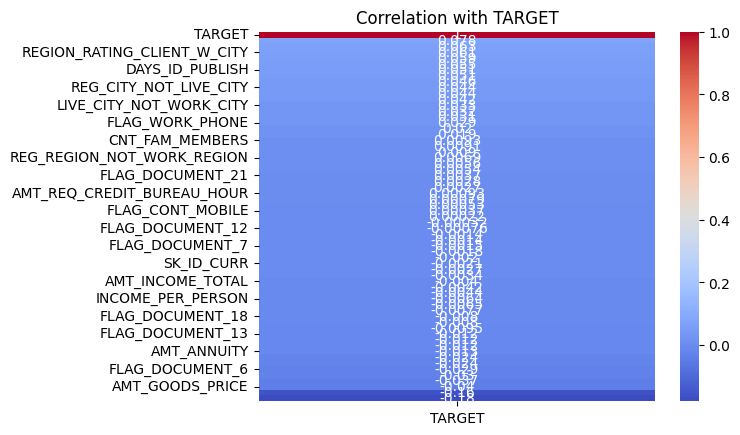

In [20]:
corr = app_df.select_dtypes(include='number').corr()
sns.heatmap(corr[['TARGET']].sort_values(by='TARGET', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with TARGET')
plt.show()

In [ ]:
sel= ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_CHILDREN', 'TARGET']
sns.pairplot(app_df[sel], hue='TARGET')
plt.show()

In [22]:
pre_agg = pre_df.groupby('SK_ID_CURR').agg({
    'NAME_CONTRACT_TYPE': 'count',
    'AMT_APPLICATION': 'mean',
    'AMT_CREDIT': 'mean',
    'NAME_CLIENT_TYPE': lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
}).rename(columns={
    'NAME_CONTRACT_TYPE': 'PRE_APP_COUNT',
    'AMT_APPLICATION': 'PRE_APP_AMT_MEAN',
    'AMT_CREDIT': 'PRE_CREDIT_AMT_MEAN',
    'NAME_CLIENT_TYPE': 'CLIENT_TYPE'
})

In [23]:
app_df = app_df.merge(pre_agg, on='SK_ID_CURR', how='left')

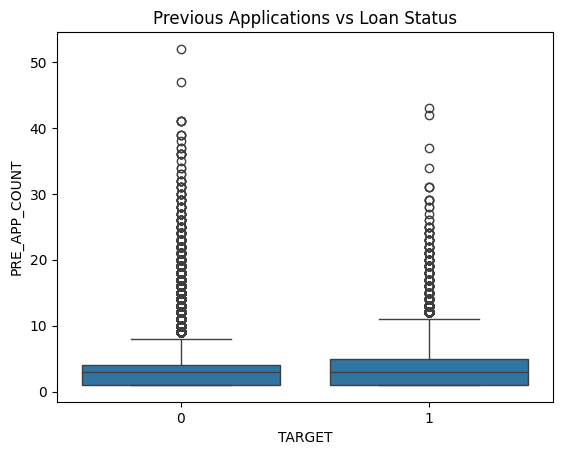

In [25]:
sns.boxplot(x='TARGET', y='PRE_APP_COUNT', data=app_df)
plt.title('Previous Applications vs Loan Status')
plt.show()

In [28]:
def_rate = app_df['TARGET'].mean()
print(f"Overall Default Rate: {def_rate:.2%}")

Overall Default Rate: 8.07%


In [27]:
app_df.to_csv('processed_application_data.csv', index=False)